In [528]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [529]:
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [530]:
warnings.filterwarnings('ignore')

In [531]:
sns.set_theme(context = 'paper' , style = 'whitegrid' ,
              palette = 'hsv' , rc = {'figure.figsize' : (10 , 4)}) 

In [532]:
%matplotlib inline

In [533]:
df = pd.read_csv('Employees Promotion V1.csv')
df.head()

,EmployeeID,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score,Is Promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8,NO,49.0,NO
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4,NO,60.0,NO
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7,NO,50.0,NO
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10,NO,50.0,NO
4,48945,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2,NO,73.0,NO


In [534]:
df.drop(['EmployeeID'] , axis = 1 , inplace = True )

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Department            54603 non-null  object 
 1   Region_Employment     54808 non-null  object 
 2   Education Level       52399 non-null  object 
 3   Gender                54808 non-null  object 
 4   Recruitment Channel   44404 non-null  object 
 5   NO_Trainings_LstYear  54808 non-null  int64  
 6   Age                   54268 non-null  float64
 7   previous_year_rating  50684 non-null  float64
 8   Service Length        54808 non-null  int64  
 9   Awards                54808 non-null  object 
 10  Avg_Training_Score    52248 non-null  float64
 11  Is Promoted           54808 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 5.0+ MB


In [536]:
df.isnull().mean()*100

Department               0.374033
Region_Employment        0.000000
Education Level          4.395344
Gender                   0.000000
Recruitment Channel     18.982630
NO_Trainings_LstYear     0.000000
Age                      0.985258
previous_year_rating     7.524449
Service Length           0.000000
Awards                   0.000000
Avg_Training_Score       4.670851
Is Promoted              0.000000
dtype: float64

In [537]:
df.duplicated().sum()

157

In [538]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [539]:
col_to_drp_nul = ['Department' , 'Education Level' , 'Age' , 'Avg_Training_Score']

In [540]:
df.dropna(subset = col_to_drp_nul , axis = 0 , inplace = True)

In [541]:
df.reset_index(inplace = True , drop = True)

In [542]:
df['Department'].value_counts()

Sales & Marketing    14409
Operations            9612
Procurement           6957
Technology            6935
Analytics             4942
HR                    2261
Finance               2162
R&D                    958
Legal                  894
Name: Department, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Department'>

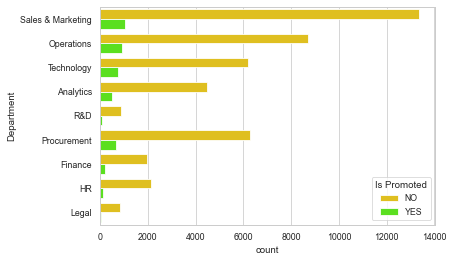

In [543]:
sns.countplot(y = df['Department'] , hue = df['Is Promoted'])

In [544]:
other = df['Region_Employment'].value_counts().to_frame()

In [545]:
idx = other[other['Region_Employment'] < 1000].index

In [546]:
df['Region_Employment'] = df['Region_Employment'].apply(lambda x : 'Other' if x in idx else x)

<AxesSubplot:xlabel='count', ylabel='Region_Employment'>

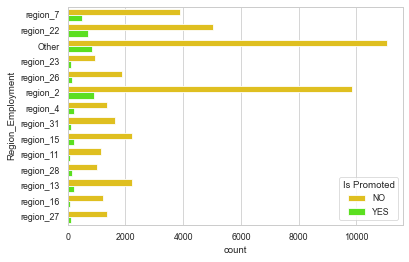

In [547]:
sns.countplot(y = df['Region_Employment'] , hue = df['Is Promoted'])

In [548]:
df['Education Level'].value_counts()

Bachelor's          34269
Master's & above    14135
Below Secondary       726
Name: Education Level, dtype: int64

<AxesSubplot:xlabel='Education Level', ylabel='count'>

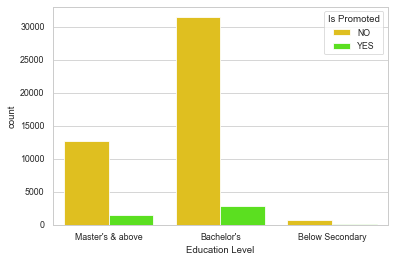

In [549]:
sns.countplot(df['Education Level'] , hue = df['Is Promoted'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

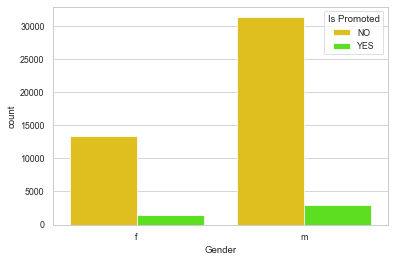

In [550]:
sns.countplot(df['Gender'] , hue = df['Is Promoted'])

<AxesSubplot:xlabel='Recruitment Channel', ylabel='count'>

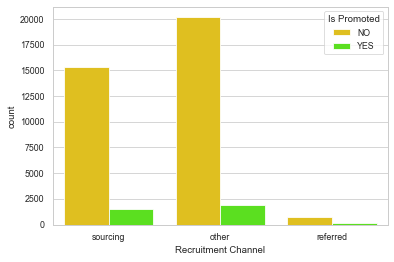

In [551]:
sns.countplot(df['Recruitment Channel'] , hue = df['Is Promoted'])

In [552]:
df['NO_Trainings_LstYear'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NO_Trainings_LstYear,49130.0,1.25921,0.616193,1.0,1.0,1.0,1.0,10.0


<AxesSubplot:xlabel='NO_Trainings_LstYear', ylabel='Density'>

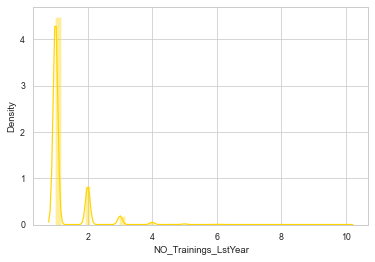

In [553]:
sns.distplot(df['NO_Trainings_LstYear'])

<AxesSubplot:xlabel='NO_Trainings_LstYear', ylabel='count'>

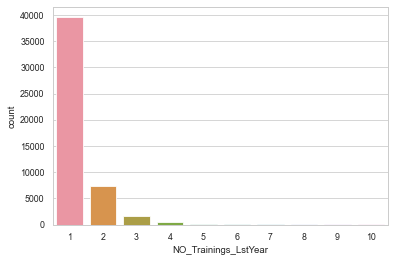

In [554]:
sns.countplot(df['NO_Trainings_LstYear'])

In [555]:
df['NO_Trainings_LstYear'] = df['NO_Trainings_LstYear'].apply(lambda x : '1' if x == 1 else '>1')

<AxesSubplot:xlabel='NO_Trainings_LstYear', ylabel='count'>

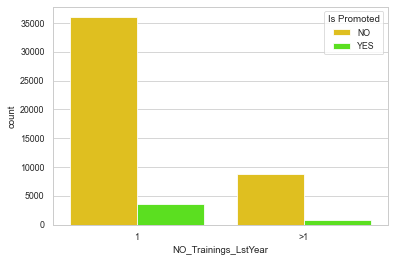

In [556]:
sns.countplot(df['NO_Trainings_LstYear'] , hue = df['Is Promoted'])

In [557]:
df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,49130.0,34.76837,8.052801,0.0,29.0,33.0,39.0,60.0


<AxesSubplot:xlabel='Age'>

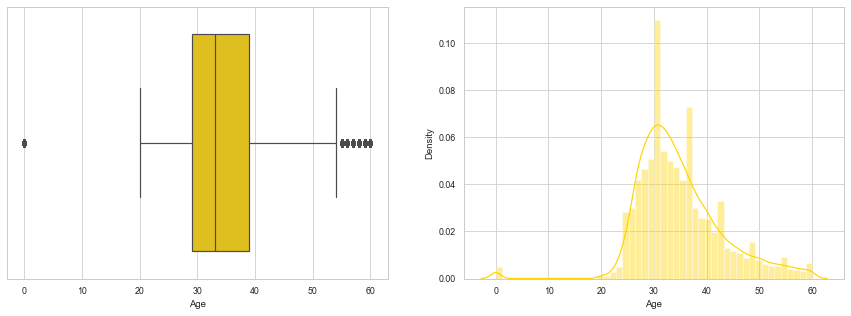

In [558]:
grid , axis = plt.subplots(nrows=1 , ncols=2 ,figsize = (15 , 5))
sns.distplot((df['Age']) , ax = axis[1])
sns.boxplot((df['Age']) , ax = axis[0])

In [559]:
df['Age'].loc[df[df['Age'] == 0].index] = np.nan

In [560]:
df['previous_year_rating'].value_counts()

3.0    16777
5.0    10618
4.0     8907
1.0     5557
2.0     3842
Name: previous_year_rating, dtype: int64

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

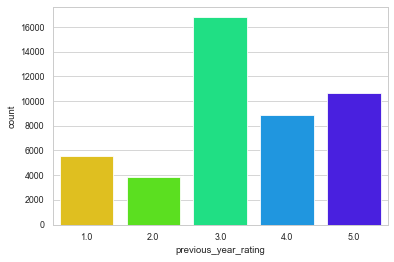

In [561]:
sns.countplot(df['previous_year_rating'] )

In [562]:
df['Service Length'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Service Length,49130.0,5.937899,4.271438,1.0,3.0,5.0,8.0,37.0


<AxesSubplot:xlabel='Service Length'>

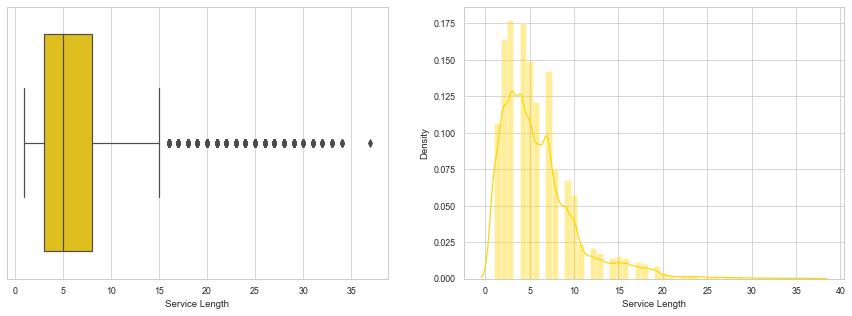

In [563]:
grid , axis = plt.subplots(nrows=1 , ncols=2 ,figsize = (15 , 5))
sns.distplot((df['Service Length']) , ax = axis[1])
sns.boxplot((df['Service Length']) , ax = axis[0])

In [564]:
df[df['Service Length'] > 15]

,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score,Is Promoted
12,Technology,Other,Master's & above,m,other,>1,39.0,3.0,16,NO,80.0,NO
38,HR,region_2,Bachelor's,m,sourcing,1,59.0,4.0,26,NO,52.0,NO
54,Sales & Marketing,region_4,Master's & above,m,other,1,50.0,4.0,17,NO,47.0,YES
89,Finance,region_2,Master's & above,m,other,1,60.0,5.0,17,NO,59.0,NO
99,Analytics,region_22,Master's & above,m,NaN,1,42.0,2.0,19,NO,79.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
48958,Sales & Marketing,region_2,Master's & above,f,other,1,57.0,5.0,24,NO,49.0,NO
48960,Sales & Marketing,Other,Master's & above,m,sourcing,1,47.0,2.0,16,NO,47.0,NO
49025,Analytics,region_2,Master's & above,m,sourcing,1,47.0,5.0,19,NO,86.0,NO
49028,Operations,region_2,Bachelor's,f,NaN,>1,52.0,5.0,18,NO,56.0,YES


<AxesSubplot:xlabel='Awards', ylabel='count'>

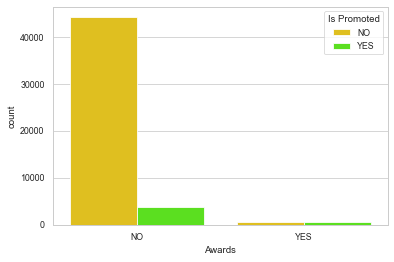

In [565]:
sns.countplot(df['Awards'] , hue = df['Is Promoted'])

In [566]:
df['Avg_Training_Score'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Avg_Training_Score,49130.0,63.972909,13.452146,39.0,51.0,60.0,77.0,99.0


<AxesSubplot:xlabel='Avg_Training_Score'>

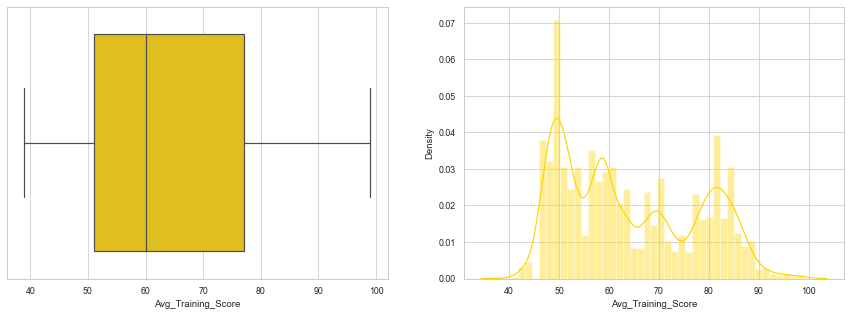

In [567]:
grid , axis = plt.subplots(nrows=1 , ncols=2 ,figsize = (15 , 5))
sns.distplot((df['Avg_Training_Score']) , ax = axis[1])
sns.boxplot((df['Avg_Training_Score']) , ax = axis[0])

<AxesSubplot:xlabel='Is Promoted', ylabel='count'>

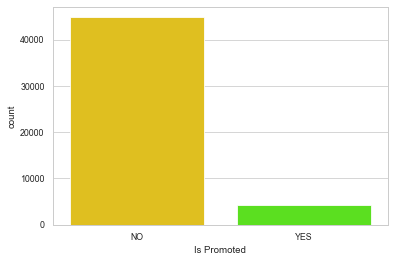

In [568]:
sns.countplot(df['Is Promoted'])

In [569]:
df.isnull().mean()*100

Department               0.000000
Region_Employment        0.000000
Education Level          0.000000
Gender                   0.000000
Recruitment Channel     19.010788
NO_Trainings_LstYear     0.000000
Age                      0.604519
previous_year_rating     6.979442
Service Length           0.000000
Awards                   0.000000
Avg_Training_Score       0.000000
Is Promoted              0.000000
dtype: float64

In [570]:
df.dropna(subset = ['Age'] , axis = 0 , inplace = True)

In [571]:
df.reset_index(inplace = True , drop = True)

In [572]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [573]:
col_to_imput = ['Recruitment Channel' , 'previous_year_rating']

In [574]:
df[col_to_imput] = imputer.fit_transform(df[col_to_imput])

In [575]:
df.isnull().mean()*100

Department              0.0
Region_Employment       0.0
Education Level         0.0
Gender                  0.0
Recruitment Channel     0.0
NO_Trainings_LstYear    0.0
Age                     0.0
previous_year_rating    0.0
Service Length          0.0
Awards                  0.0
Avg_Training_Score      0.0
Is Promoted             0.0
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Avg_Training_Score'>

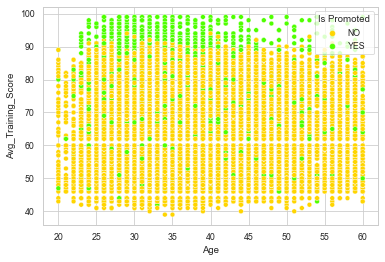

In [576]:
sns.scatterplot(x = df['Age'] ,y = df['Avg_Training_Score'] , hue = df['Is Promoted'])

<AxesSubplot:xlabel='Service Length', ylabel='Avg_Training_Score'>

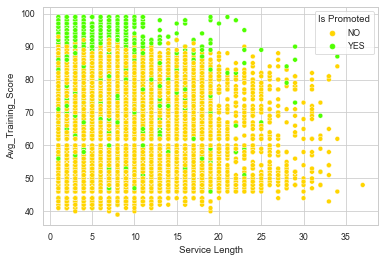

In [577]:
sns.scatterplot(x = df['Service Length'] ,y = df['Avg_Training_Score'] , hue = df['Is Promoted'])

<AxesSubplot:xlabel='Age', ylabel='Service Length'>

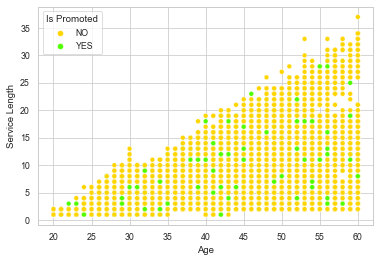

In [578]:
sns.scatterplot(x = df['Age'] ,y = df['Service Length'] , hue = df['Is Promoted'])

In [579]:
col_to_encd = ['Recruitment Channel' , 'Gender' , 'NO_Trainings_LstYear' , 'Awards']

In [580]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [581]:
df = pd.concat([df , pd.DataFrame(ohe.fit_transform(df[col_to_encd]) , columns = ohe.get_feature_names_out())] , axis = 1 )

In [582]:
df.drop(col_to_encd, axis = 1 , inplace = True)

In [583]:
le = LabelEncoder()

In [584]:
df['Is Promoted'] = le.fit_transform(df[['Is Promoted']])

In [585]:
df['Education Level'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [586]:
mapper = {"Master's & above" : 3 , "Bachelor's" : 2 , 'Below Secondary' : 1}

In [587]:
df['Education Level'] = df['Education Level'].map(mapper)

In [588]:
col_to_encd = ['Department' , 'Region_Employment']

In [589]:
be = BinaryEncoder()

In [590]:
df = pd.concat([df , be.fit_transform(df[col_to_encd])] , axis = 1 )

In [591]:
df.drop(col_to_encd , axis = 1 , inplace = True)

In [592]:
x = df.drop(['Is Promoted'] , axis = 1 )
y = df['Is Promoted']

In [593]:
df['Is Promoted'].value_counts()

0    44544
1     4289
Name: Is Promoted, dtype: int64

In [594]:
sm = SMOTE(sampling_strategy = {1 : 10000} , random_state = 3)

In [595]:
x , y = sm.fit_resample(x , y)

In [596]:
y.value_counts()

0    44544
1    10000
Name: Is Promoted, dtype: int64

In [597]:
#rm = RandomUnderSampler(sampling_strategy = { 0 : 30000})

In [598]:
#x , y = rm.fit_resample(x , y)

In [599]:
x_train , x_test , y_train , y_test = train_test_split(x , y , stratify = y , 
                                                      test_size = 0.25 , shuffle = True , 
                                                      random_state = 7)

In [600]:
sclr = StandardScaler()

In [601]:
x_train[x_train.columns] = sclr.fit_transform(x_train[x_train.columns])

In [602]:
x_test[x_test.columns] = sclr.transform(x_test[x_test.columns])

In [603]:
poly = PolynomialFeatures(degree = 2)

In [604]:
x_train = poly.fit_transform(x_train)

In [605]:
model = LogisticRegression(penalty = 'l2' , C = 0.1)

In [606]:
model.fit(x_train , y_train)

LogisticRegression(C=0.1)

In [607]:
y_train_prd = model.predict(x_train)

In [608]:
y_test_prd = model.predict(poly.transform(x_test))

In [609]:
accuracy_score(y_true = y_train , y_pred = y_train_prd)

0.9194534076464261

In [610]:
accuracy_score(y_true = y_test , y_pred = y_test_prd)

0.9196978586095629

In [611]:
cm = confusion_matrix(y_true = y_train , y_pred = y_train_prd)

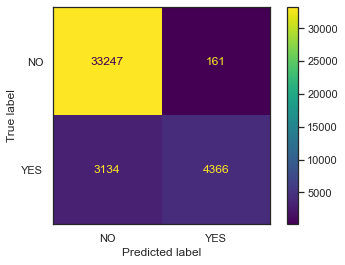

In [612]:
sns.set_theme(style = 'white')
ConfusionMatrixDisplay(cm , display_labels = le.inverse_transform(model.classes_)).plot()

In [613]:
cm = confusion_matrix(y_true = y_test , y_pred = y_test_prd)

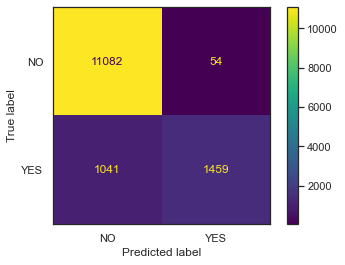

In [614]:
ConfusionMatrixDisplay(cm , display_labels = le.inverse_transform(model.classes_)).plot()

In [615]:
joblib.dump(model , 'model.pkl')

['model.pkl']

In [616]:
joblib.dump(sclr , 'sclr.pkl')

['sclr.pkl']

In [617]:
joblib.dump(le , 'label_encoder.pkl')

['label_encoder.pkl']

In [618]:
joblib.dump(be , 'binary_encoder.pkl')

['binary_encoder.pkl']

In [619]:
joblib.dump(mapper , 'EDU_level_mapper.pkl')

['EDU_level_mapper.pkl']